In [1]:
from PIL import Image
import pyocr
import cv2

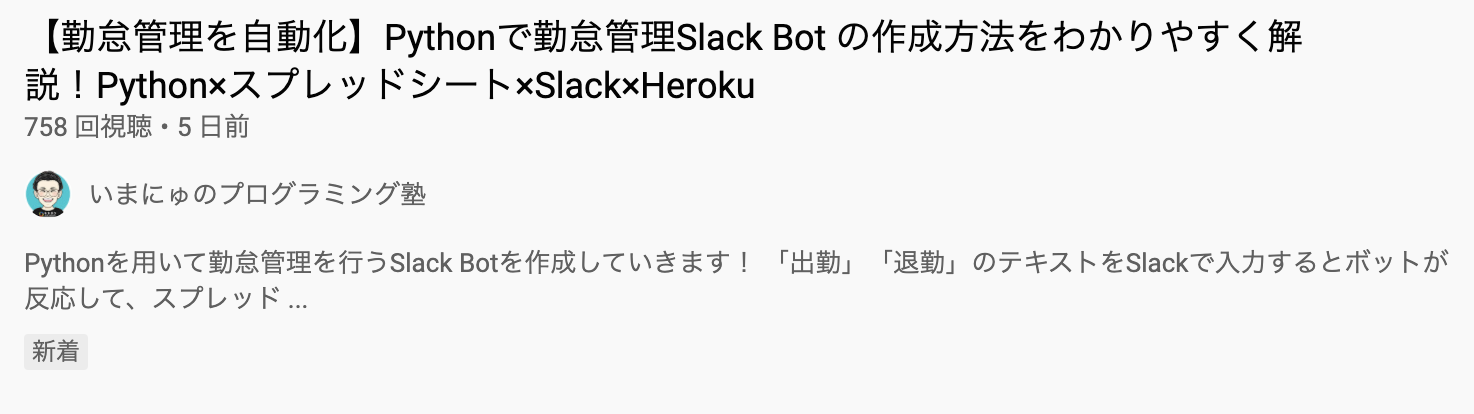

In [2]:
img1 = Image.open('sample01.png')
img1

In [3]:
tools = pyocr.get_available_tools()
tools

[<module 'pyocr.tesseract' from '/usr/local/lib/python3.8/site-packages/pyocr/tesseract.py'>,
 <module 'pyocr.libtesseract' from '/usr/local/lib/python3.8/site-packages/pyocr/libtesseract/__init__.py'>]

In [4]:
tool = tools[0]
tool.get_name()

'Tesseract (sh)'

In [7]:
txt1 = tool.image_to_string(
    img1,
    lang='jpn',
    builder=pyocr.builders.TextBuilder(tesseract_layout=3,)
)
txt1

'【勤怠管理を自動化】 Pythonで勤怠管理Slack Bot の作成方法をわかりやすく解\n説! PythonxスプレッドシートxSlackxHeroku\n758 回視聴・5 日前\n9 いまにゅのプログラミング吉\nPythonを用いて勤怠管理を行うSlack Botを作成していきます ! 「出勤」「退勤 のテキストをSlackで入力するとボットが\n反応して、スプレッド .…\n新着'

In [8]:
print(txt1)

【勤怠管理を自動化】 Pythonで勤怠管理Slack Bot の作成方法をわかりやすく解
説! PythonxスプレッドシートxSlackxHeroku
758 回視聴・5 日前
9 いまにゅのプログラミング吉
Pythonを用いて勤怠管理を行うSlack Botを作成していきます ! 「出勤」「退勤 のテキストをSlackで入力するとボットが
反応して、スプレッド .…
新着


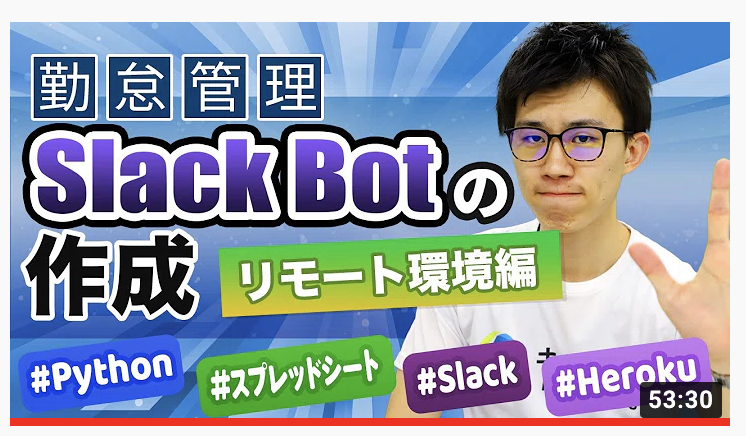

In [9]:
img2 = Image.open('sample02.png')
img2

In [10]:
txt2 = tool.image_to_string(
    img2,
    lang='eng+jpn',
    builder=pyocr.builders.TextBuilder(tesseract_layout=11)
)
txt2

'勤\n\niN\n\nPe 2 だ\n\nグフ\n\nSIaCK(B0iO\n\nリモ ニート 環境 編\n\n成\n\nFI EE\n\n53:30 |'

In [11]:
img_gray = cv2.imread('sample02.png', 0)
cv2.imwrite('sample03.png', img_gray)
                      

True

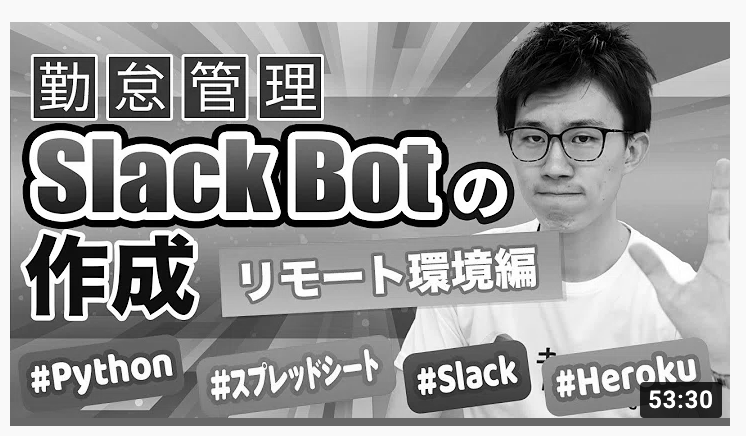

In [12]:
img3 = Image.open('sample03.png')
img3

In [13]:
txt3 = tool.image_to_string(
    img3,
    lang='eng+jpn',
    builder=pyocr.builders.TextBuilder(tesseract_layout=11)
)
txt3

'"ha\n\nBae\n\neee\n\nSIaCK(B0i の\n\nnN,\n\nVes\n\n作\n\nPala\n\nA\n\neT!\n\nJI\n\n#Heraku\n\n53:30'

In [14]:
res1 = tool.image_to_string(
    img1,
    lang='jpn',
    builder=pyocr.builders.WordBoxBuilder(tesseract_layout=6)
)
# res1

In [15]:
box = res1[19]

In [16]:
box.content, box.position

('わか', ((1061, 13), (1145, 63)))

In [17]:
txt1[:20]

'【勤怠管理を自動化】 Pythonで勤怠'

In [18]:
out = cv2.imread('sample01.png')

In [19]:
for box in res1:
    cv2.rectangle(out, box.position[0], box.position[1], (0,0,255), 2)

cv2.imwrite('output.png', out)

True

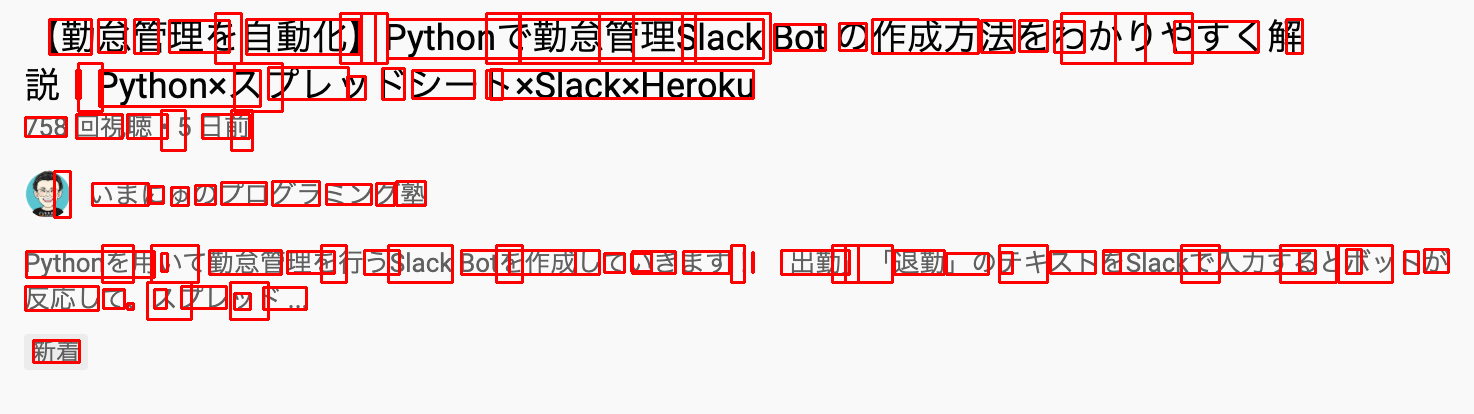

In [20]:
img_out = Image.open('output.png')
img_out

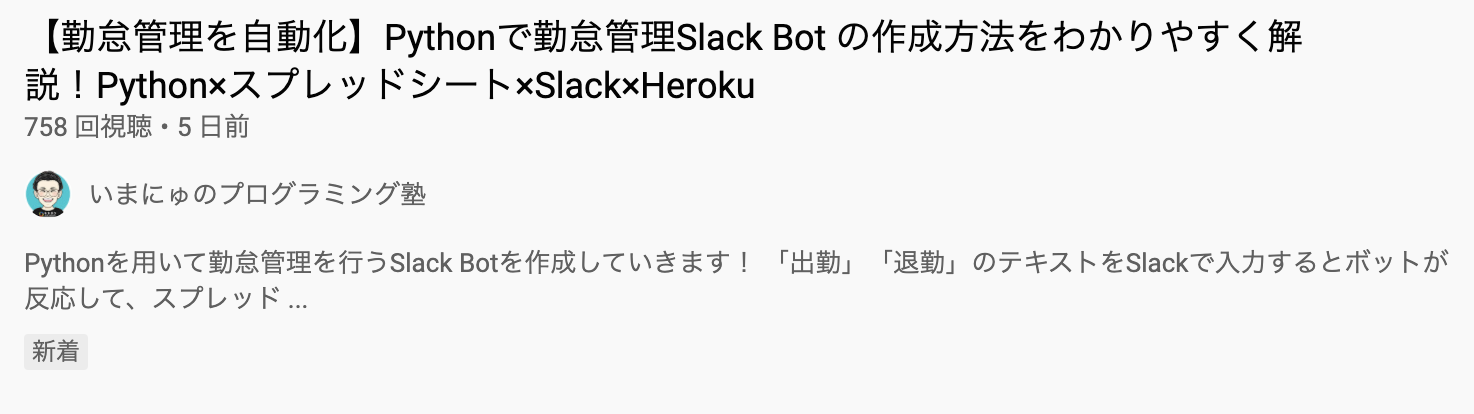

In [21]:
img1